# Data Scientist Professional Practical Exam Submission

**Use this template to write up your summary for submission. Code in Python or R needs to be included.**


## 📝 Task List

Your written report should include both code, output and written text summaries of the following:
- Data Validation:   
  - Describe validation and cleaning steps for every column in the data 
- Exploratory Analysis:  
  - Include two different graphics showing single variables only to demonstrate the characteristics of data  
  - Include at least one graphic showing two or more variables to represent the relationship between features
  - Describe your findings
- Model Development
  - Include your reasons for selecting the models you use as well as a statement of the problem type
  - Code to fit the baseline and comparison models
- Model Evaluation
  - Describe the performance of the two models based on an appropriate metric
- Business Metrics
  - Define a way to compare your model performance to the business
  - Describe how your models perform using this approach
- Final summary including recommendations that the business should undertake

*Start writing report here..*

# 1. Data Validation 

**This data set has 947 rows, 8 columns. I have validated all variables and I have not made any changes after validation. All the columns are just as described in the data dictionary:**
-  **recipe:** Numeric, unique identifier of recipe. **No missing value** .
-  **calories:** Numeric, number of calories. **52 value missing,** cleaning needed.
-  **carbohydrate:** Numeric, amount of carbohydrates in grams, **52 value missing,** cleaning needed.
-  **sugar:** Numeric, amount of sugar in grams, **52 value missing,** cleaning needed.
-  **protien:** Numeric, amount of protien in grams, **52 value missing,** cleaning needed.
-  **Category:** Character, type of recipe. **10 type of unique value,** **Extra string " Breast" Should be removed.**
-  **Servings:** Numeric, number of servings for the recipe, **4 unique value**, and **Extra string "As a snack" should be removed**.
-  **high_traffic:** Character, if the traffic to the site was high when this recipe wasshown, this is marked with “High”. **372 null values**.

In [73]:
# Start coding
#importing relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import boxcox, yeojohnson
from scipy.stats.mstats import winsorize
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
plt.style.use('ggplot')

In [74]:
#read recipe_site_traffic.csv file and convert it into dataframe
recipe_site_traffic = pd.read_csv("recipe_site_traffic_2212.csv")
recipe_site_traffic.head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,1,NaN,NaN,NaN,NaN,Pork,6,High
1,2,35.48,38.56,0.66,0.92,Potato,4,High
2,3,914.28,42.68,3.09,2.88,Breakfast,1,NaN
3,4,97.03,30.56,38.63,0.02,Beverages,4,High
4,5,27.05,1.85,0.80,0.53,Beverages,4,NaN


**Given the absence of duplicated recipes, no row removal is necessary.
Our next step involves examining the dimensions of the dataset in terms of rows and columns, along with identifying column names and their respective data types.
Additionally, we'll assess the count of non-null values present in each column.
If any data type conversions are required or if there are missing values to address, we'll take appropriate actions to rectify these concerns.**

In [75]:
print(recipe_site_traffic.info())
print(recipe_site_traffic.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   recipe        947 non-null    int64  
 1   calories      895 non-null    float64
 2   carbohydrate  895 non-null    float64
 3   sugar         895 non-null    float64
 4   protein       895 non-null    float64
 5   category      947 non-null    object 
 6   servings      947 non-null    object 
 7   high_traffic  574 non-null    object 
dtypes: float64(4), int64(1), object(3)
memory usage: 59.3+ KB
None
recipe            0
calories         52
carbohydrate     52
sugar            52
protein          52
category          0
servings          0
high_traffic    373
dtype: int64


In [76]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('str')
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].str.replace(" as a snack", "")

print(recipe_site_traffic['servings'].value_counts())

#convert back into int
recipe_site_traffic['servings'] = recipe_site_traffic['servings'].astype('int')

4    391
6    198
2    183
1    175
Name: servings, dtype: int64


In [77]:
#replacing the rows with value "High" with True, and null values with False
recipe_site_traffic['high_traffic'] = np.where(recipe_site_traffic['high_traffic'] == "High", True, False)

#checking the values of high_traffic column again
print(recipe_site_traffic['high_traffic'].value_counts())

True     574
False    373
Name: high_traffic, dtype: int64


In [78]:
#checking the values of category column
print(recipe_site_traffic['category'].value_counts())

Breakfast         106
Chicken Breast     98
Beverages          92
Lunch/Snacks       89
Potato             88
Pork               84
Vegetable          83
Dessert            83
Meat               79
Chicken            74
One Dish Meal      71
Name: category, dtype: int64


In [79]:
#replacing the rows including "as a snack" with their relevant numeric number
recipe_site_traffic['category'] = recipe_site_traffic['category'].str.replace(" Breast", "")

#converting data type of category column to category
recipe_site_traffic['category'] = recipe_site_traffic['category'].astype('category')

#checking the values of servings column again
print(recipe_site_traffic['category'].value_counts())

Chicken          172
Breakfast        106
Beverages         92
Lunch/Snacks      89
Potato            88
Pork              84
Dessert           83
Vegetable         83
Meat              79
One Dish Meal     71
Name: category, dtype: int64


In [80]:
#finding unique value in selecting feature
print(recipe_site_traffic['category'].nunique())
print(recipe_site_traffic['servings'].nunique())
print(recipe_site_traffic['high_traffic'].nunique())
print(recipe_site_traffic['category'].unique())
print(recipe_site_traffic['servings'].unique())
print(recipe_site_traffic['high_traffic'].unique())

10
4
2
['Pork', 'Potato', 'Breakfast', 'Beverages', 'One Dish Meal', 'Chicken', 'Lunch/Snacks', 'Vegetable', 'Meat', 'Dessert']
Categories (10, object): ['Beverages', 'Breakfast', 'Chicken', 'Dessert', ..., 'One Dish Meal', 'Pork', 'Potato', 'Vegetable']
[6 4 1 2]
[ True False]


In [81]:
print(recipe_site_traffic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 947 entries, 0 to 946
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   recipe        947 non-null    int64   
 1   calories      895 non-null    float64 
 2   carbohydrate  895 non-null    float64 
 3   sugar         895 non-null    float64 
 4   protein       895 non-null    float64 
 5   category      947 non-null    category
 6   servings      947 non-null    int64   
 7   high_traffic  947 non-null    bool    
dtypes: bool(1), category(1), float64(4), int64(2)
memory usage: 46.7 KB
None


In [82]:
#dropping missing values
recipe_site_traffic = recipe_site_traffic.dropna().reset_index(drop=True)

#checking missing numbers for each columns
print(recipe_site_traffic.isna().sum())

recipe          0
calories        0
carbohydrate    0
sugar           0
protein         0
category        0
servings        0
high_traffic    0
dtype: int64


# 2. Exploratory Analysis

**Analyzing the descriptive statistics, it's evident that there is a notable standard deviation, particularly in columns related to calories and nutritional components.
Additionally, the quantile values indicate the presence of outliers, contributing to skewness in the distribution. 
As a result, we can deduce that the value distribution is non-normal, underscoring that the median is a more representative measure for these columns.**

In [83]:
#generating descriptive statistic for each columns
recipe_site_traffic.describe()

,recipe,calories,carbohydrate,sugar,protein,servings
count,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,473.652514,435.939196,35.069676,9.046547,24.149296,3.458101
std,272.763283,453.020997,43.949032,14.679176,36.369739,1.735979
min,2.000000,0.140000,0.030000,0.010000,0.000000,1.000000
25%,237.500000,110.430000,8.375000,1.690000,3.195000,2.000000
50%,475.000000,288.550000,21.480000,4.550000,10.800000,4.000000
75%,708.500000,597.650000,44.965000,9.800000,30.200000,4.000000
max,947.000000,3633.160000,530.420000,148.750000,363.360000,6.000000


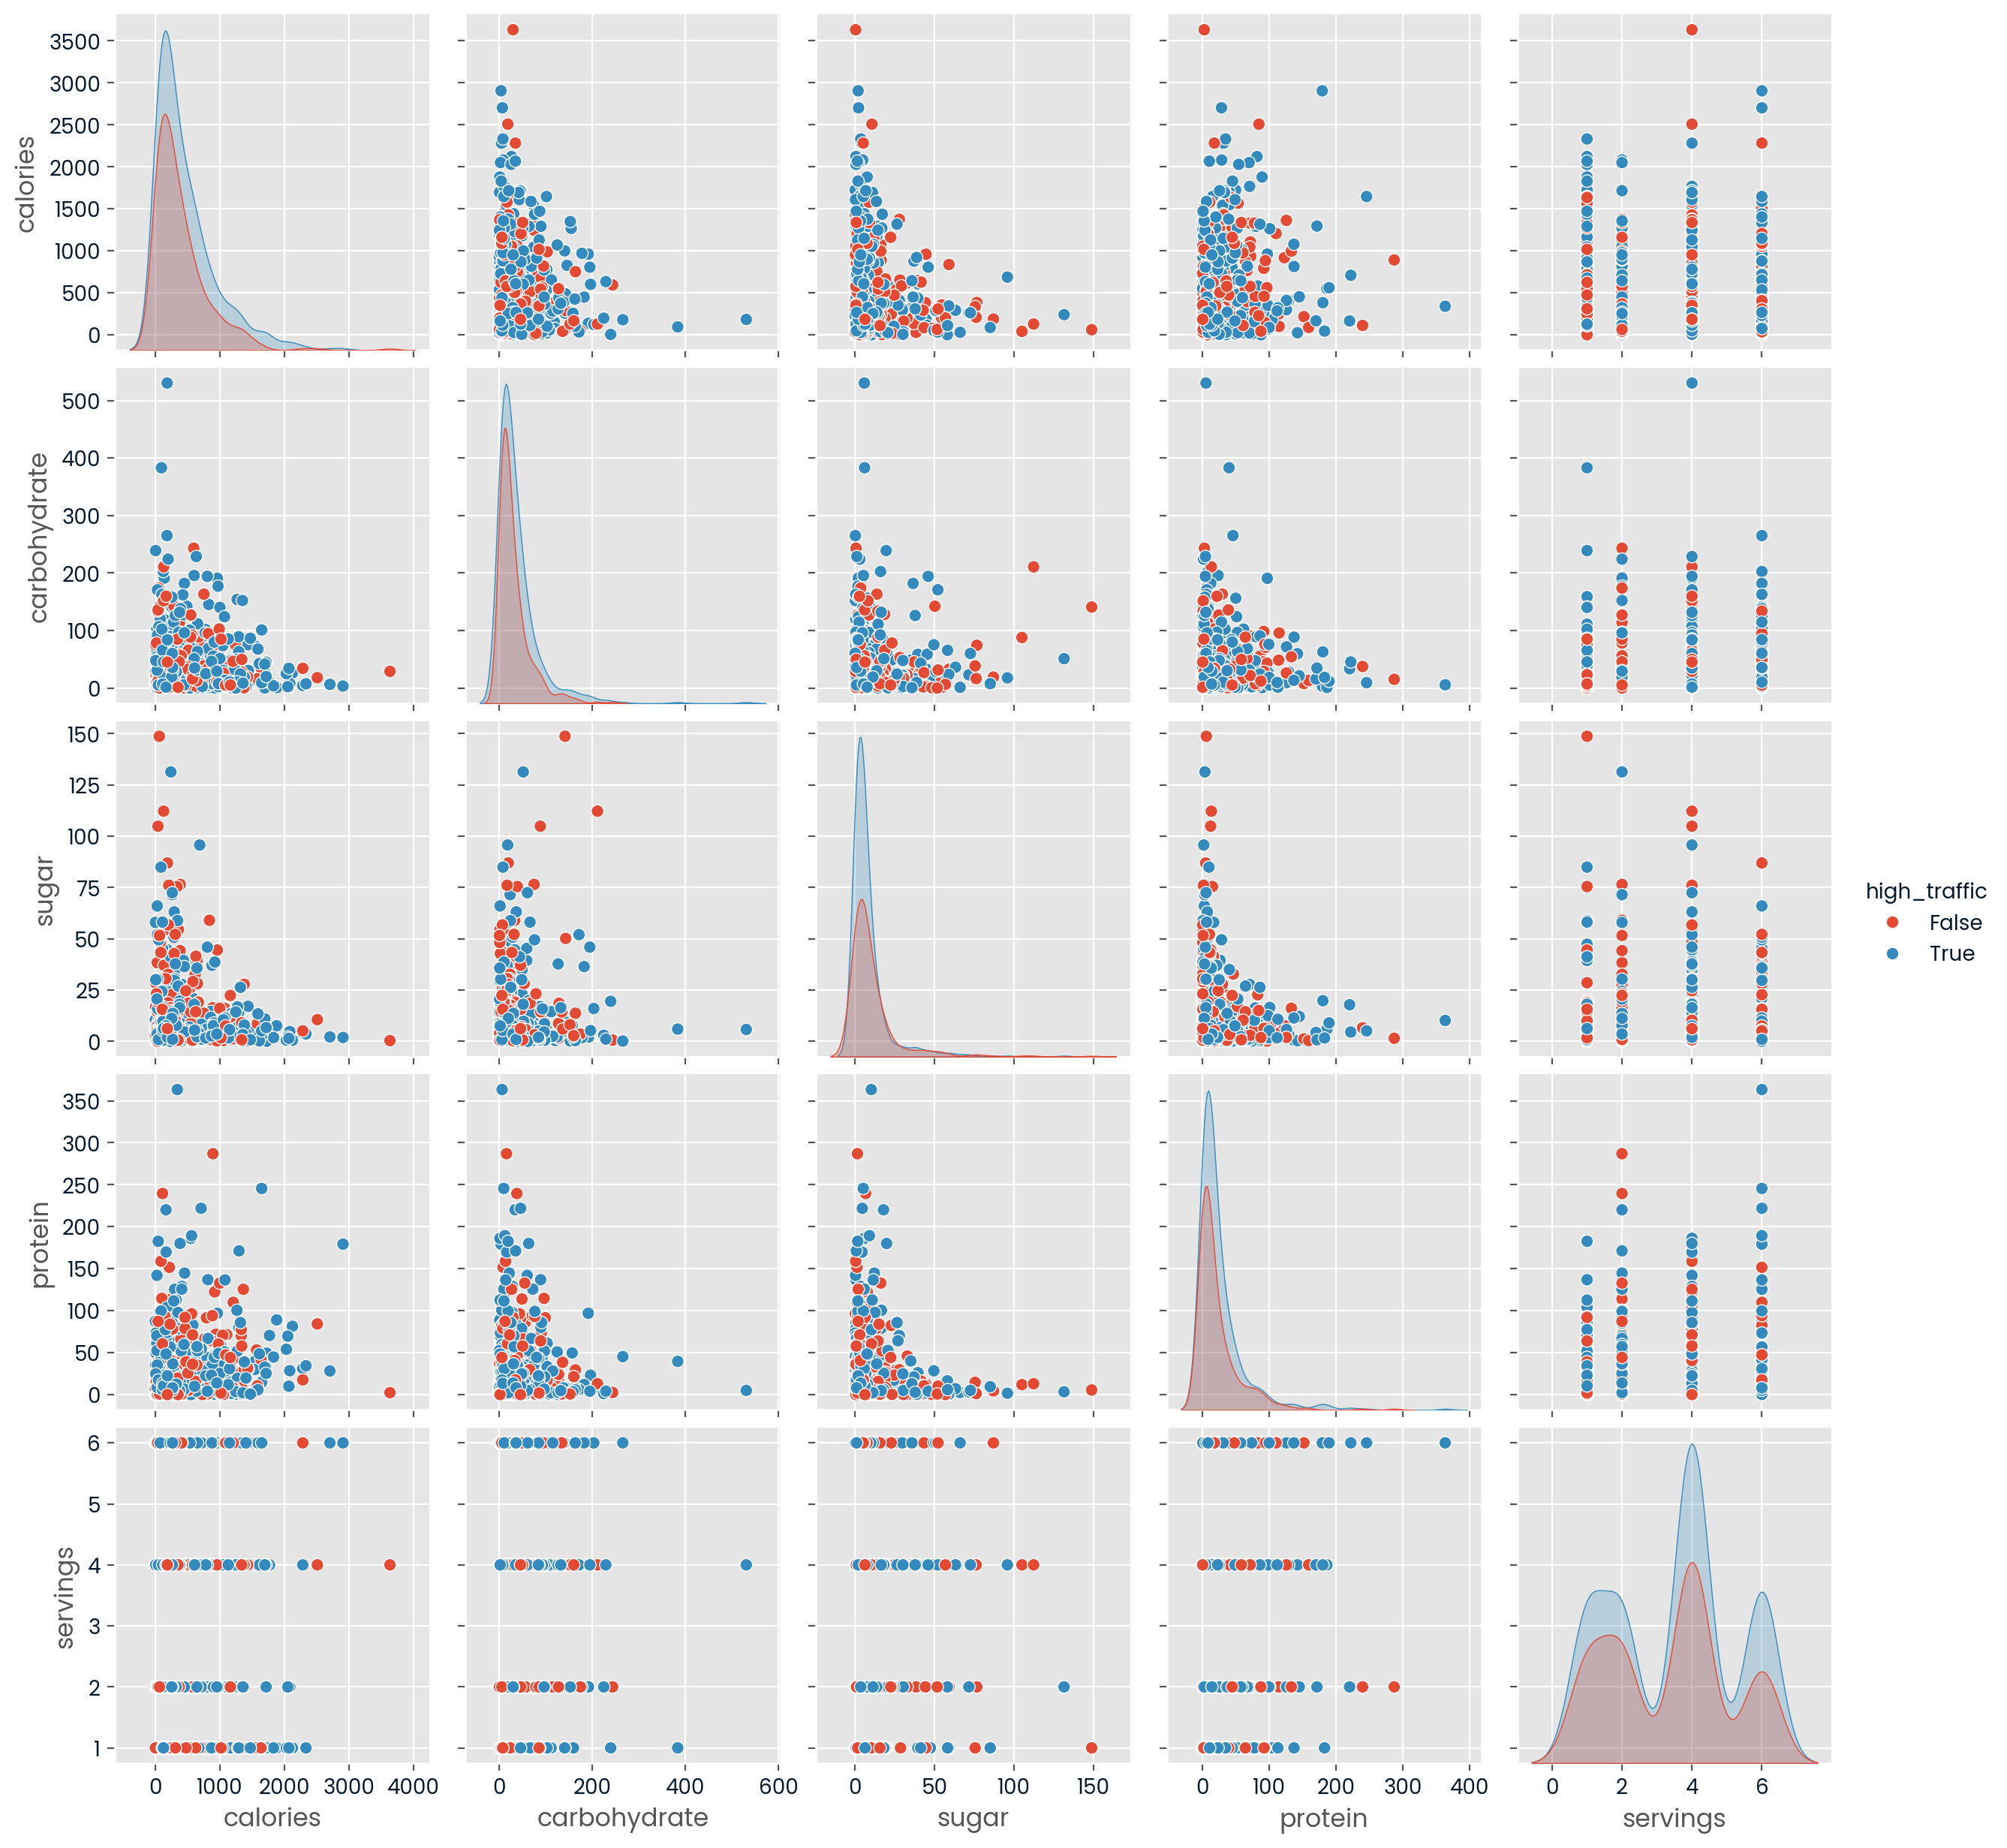

In [84]:
#filtering columns necessary for analysis.
filtered_columns = ['calories', 'carbohydrate', 'sugar', 'protein', 'category', 'servings', 'high_traffic']

sns.pairplot(recipe_site_traffic[filtered_columns], hue='high_traffic')
plt.show()

**Based on the plot, it's apparent that there isn't a significant correlation between these columns.**

**Next, we'll proceed to generate a histogram to visualize the distribution of calories within the recipes.**

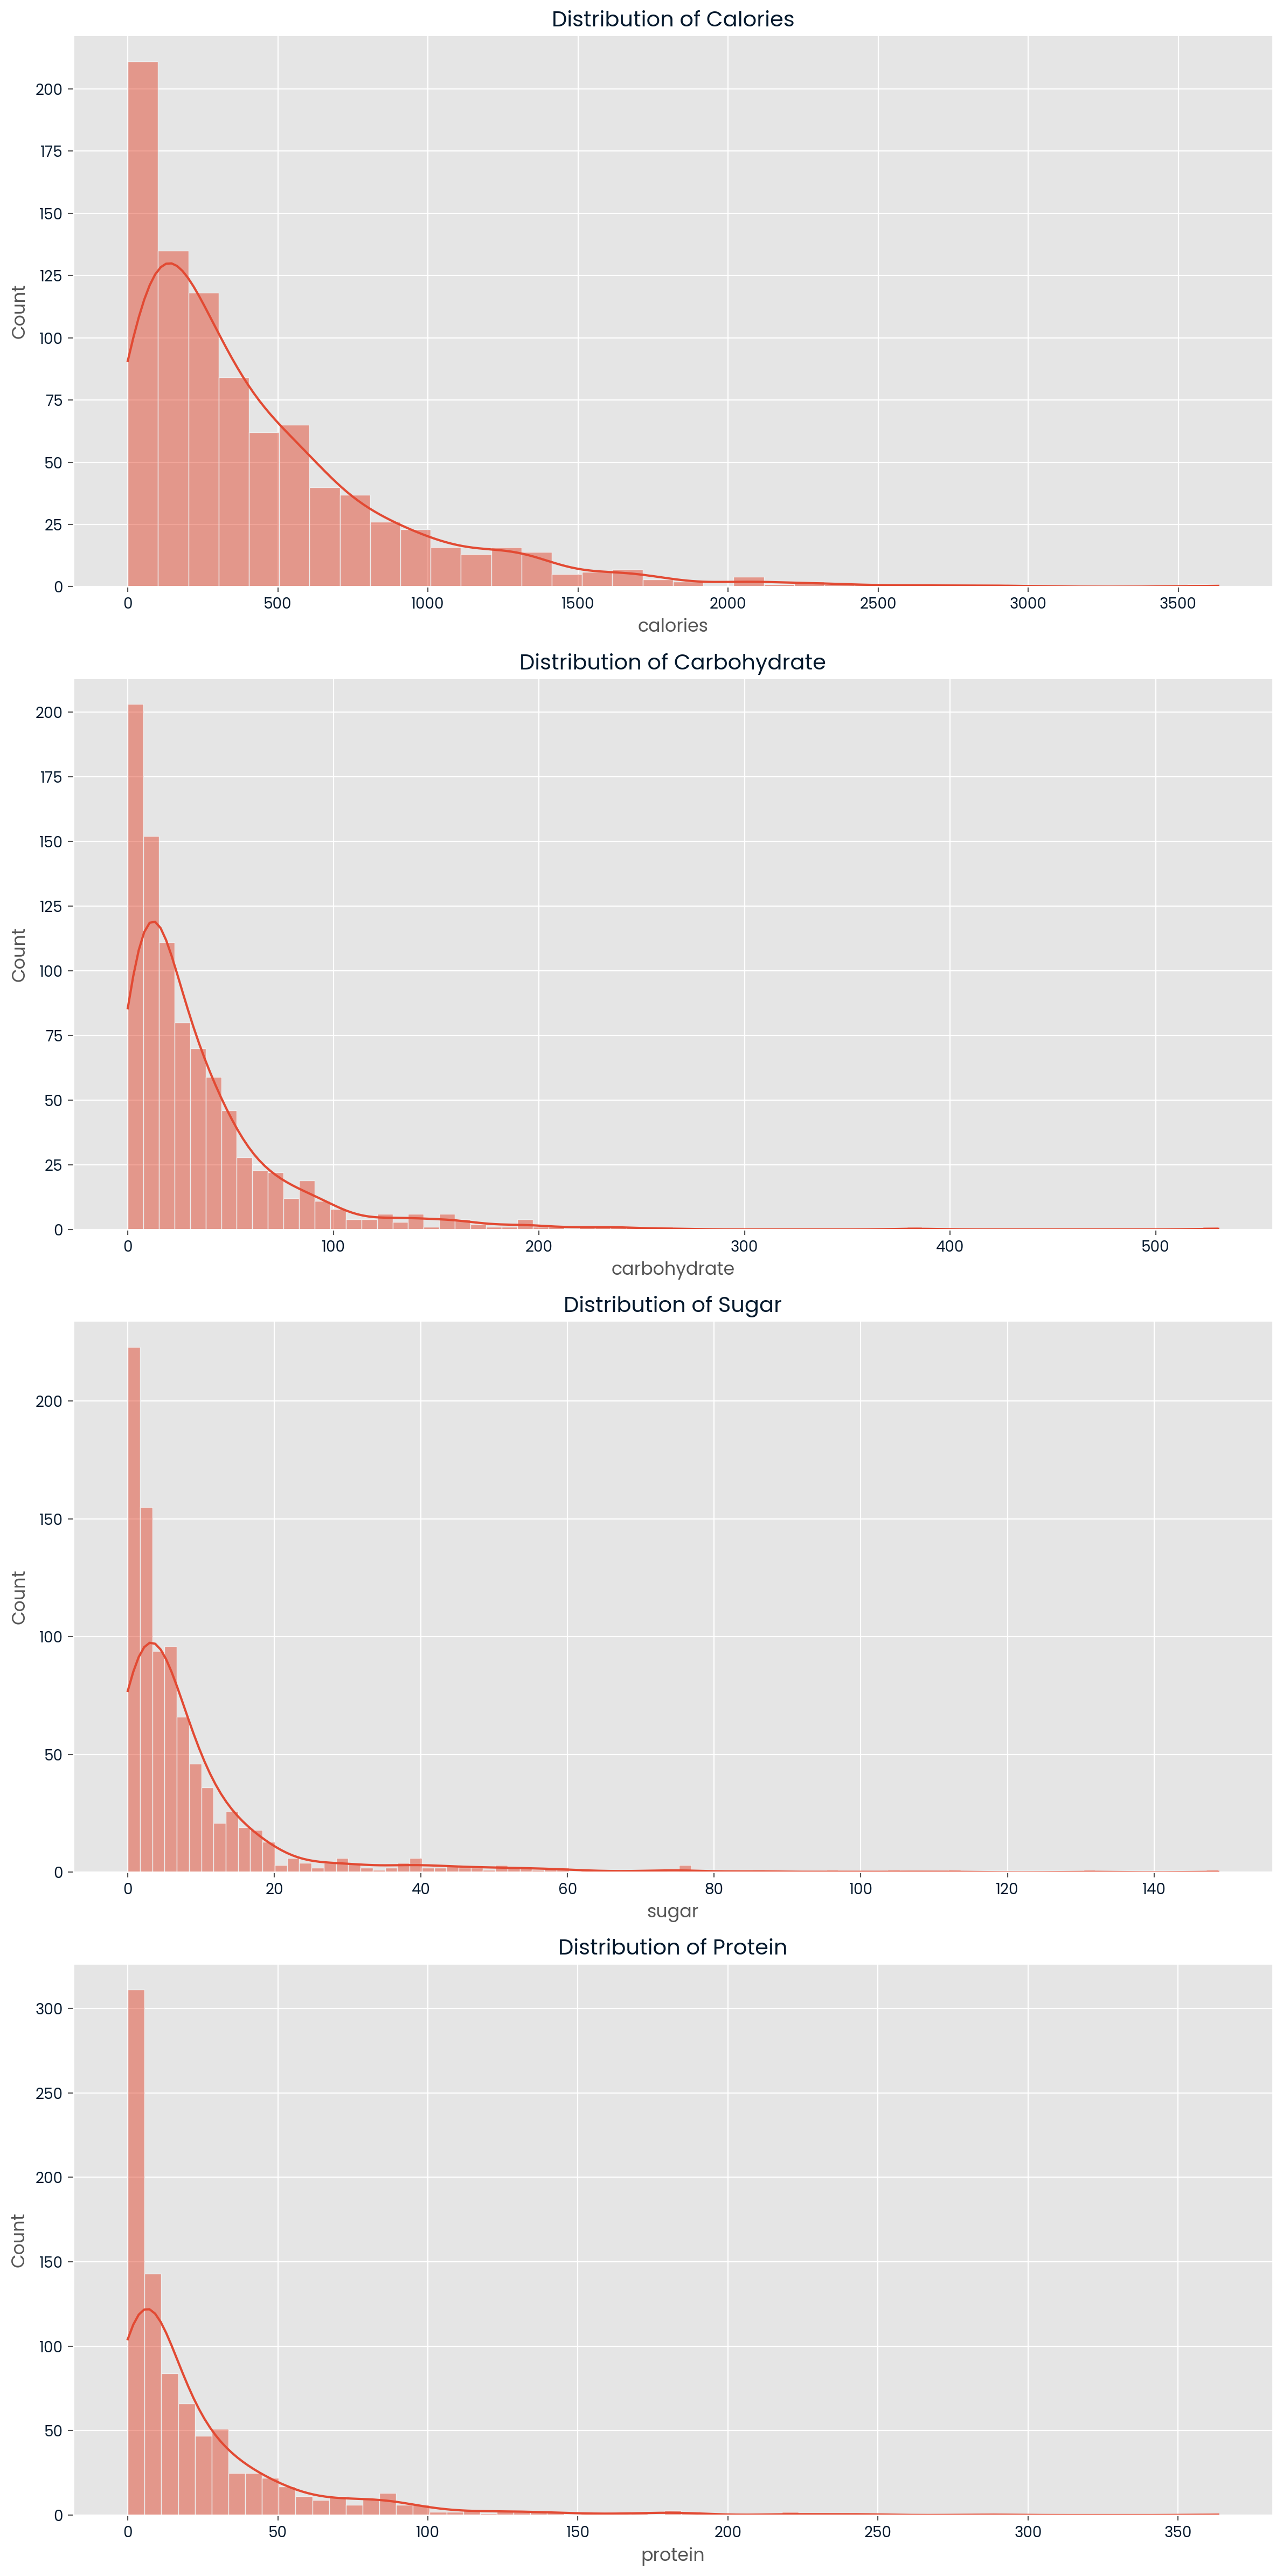

In [85]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.histplot(data=recipe_site_traffic, x=column, kde=True, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

**The presence of Kernel Density Estimation (KDE) in the plots results in a smooth curve that illustrates the underlying data distribution.**

**Upon observation, it becomes evident that the dataset predominantly consists of lower values concerning the calorie and nutritional components of foods or beverages. The histograms validate our earlier assertion regarding skewness. Indeed, all the numerical columns display a right-skewed distribution.**

**To further illustrate the distribution, let's proceed to present it using box plots.**

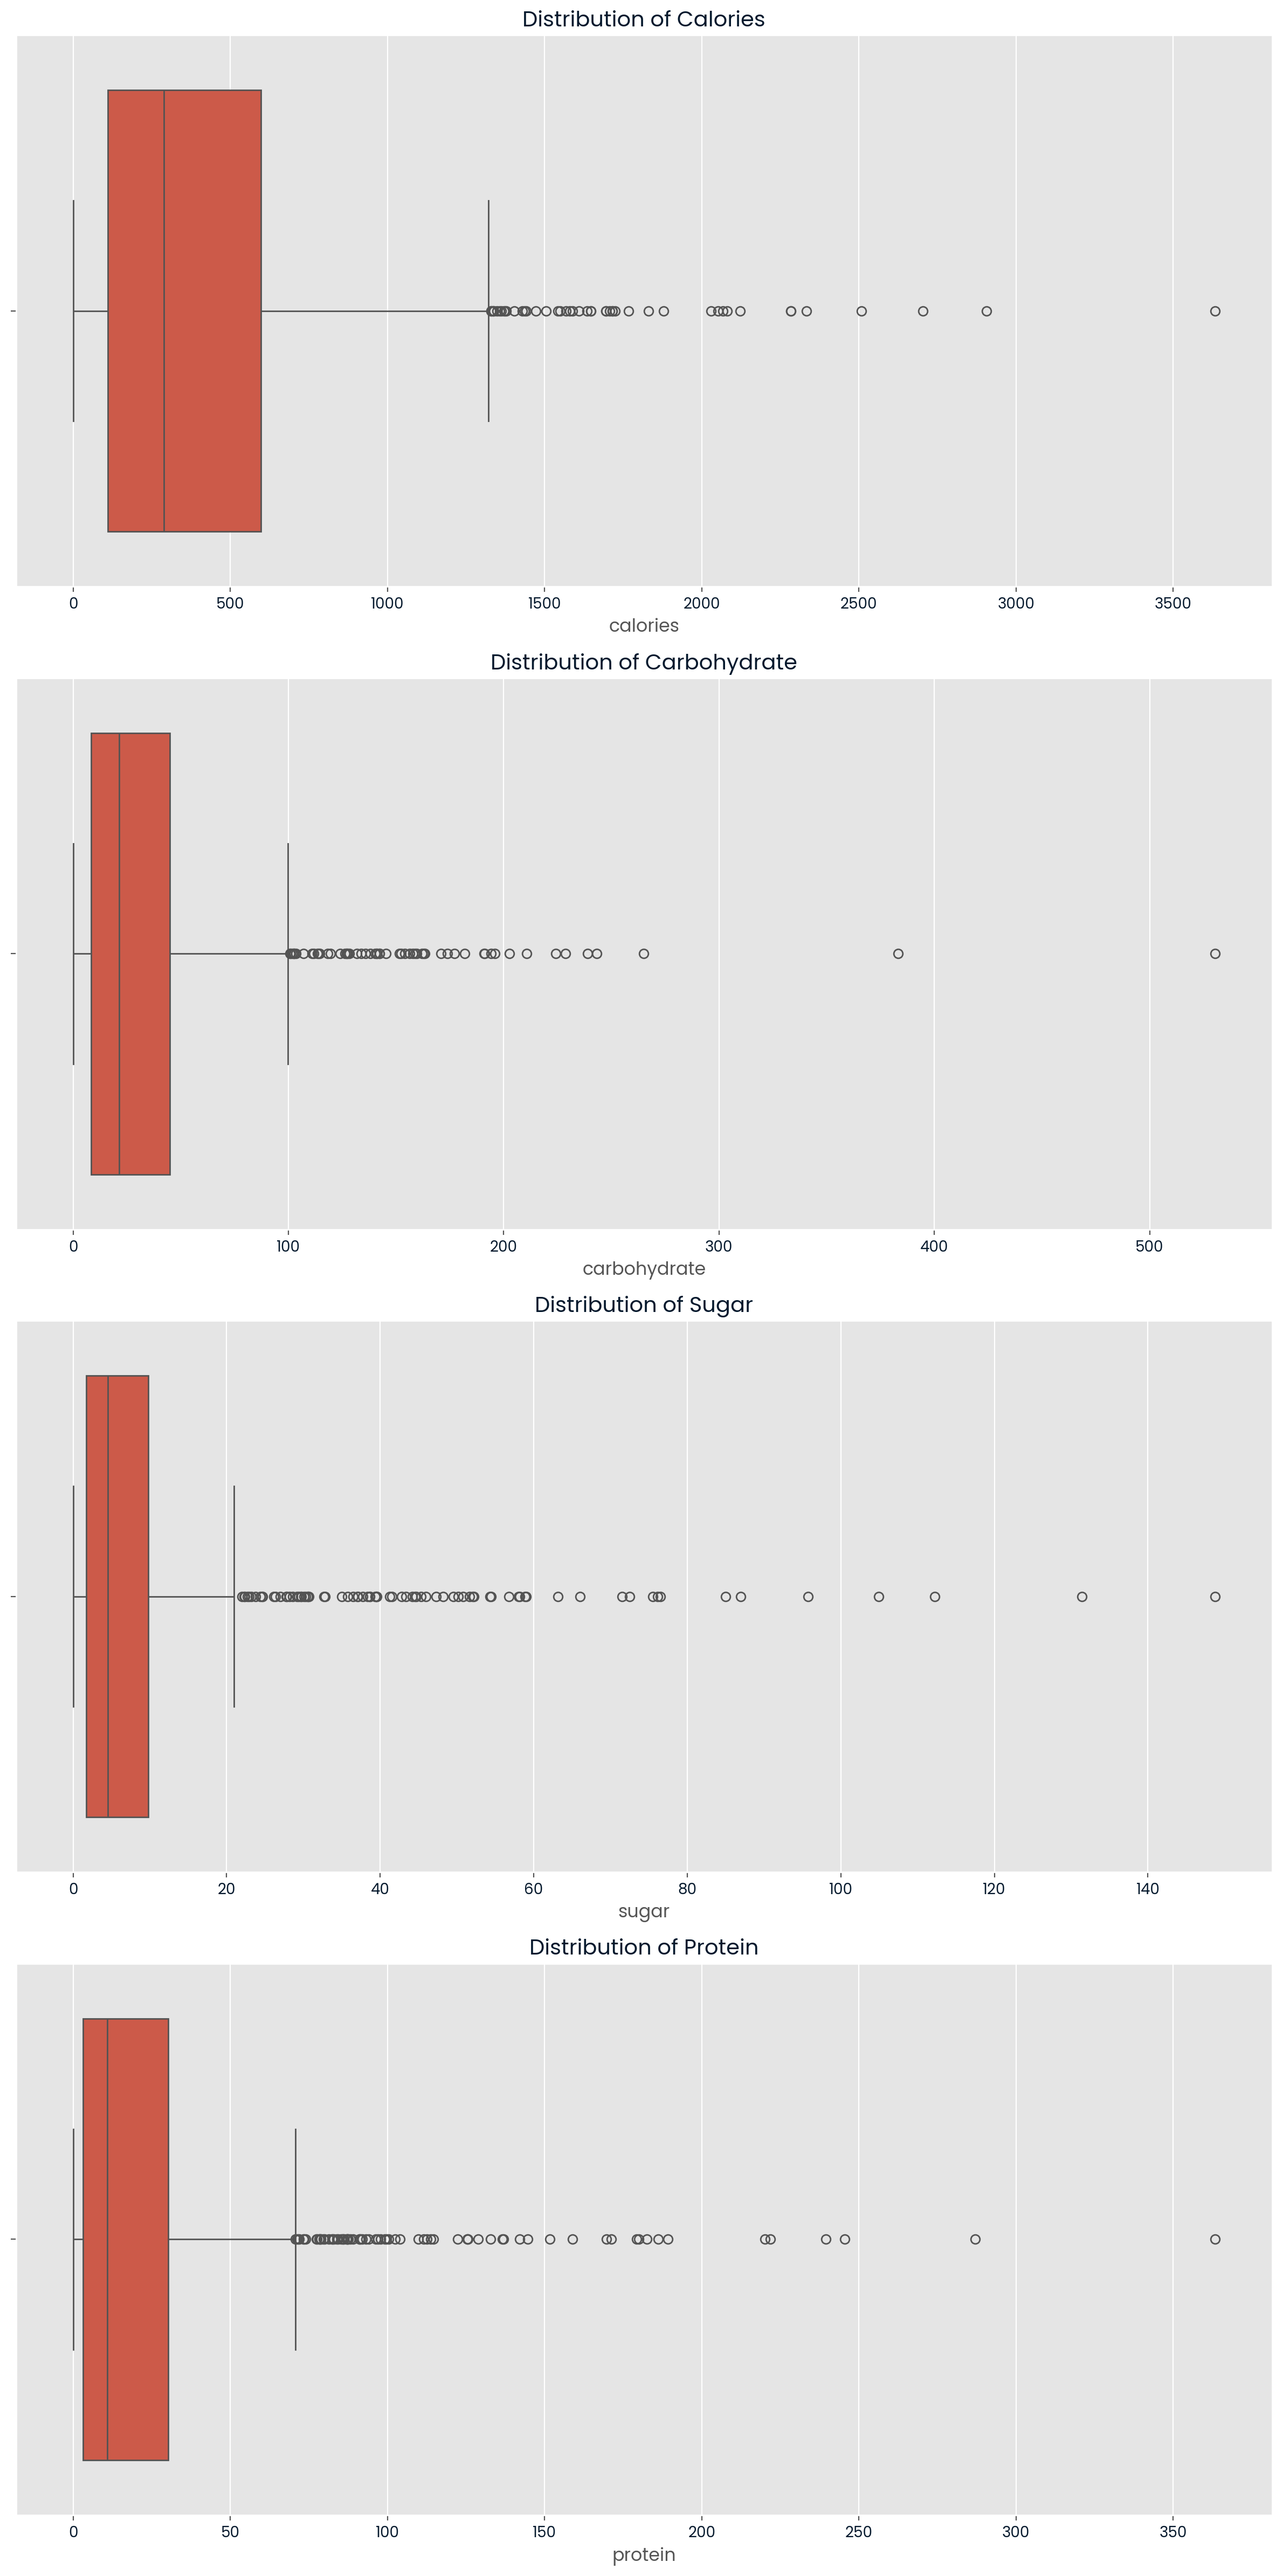

In [86]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#creating subplots with the desired number of rows and columns
num_rows = len(numerical_columns)
fig, axes = plt.subplots(num_rows, 1, figsize=(12, 6 * num_rows))

#iterating over the numerical columns and plot the distributions
for i, column in enumerate(numerical_columns):
    ax = axes[i] if num_rows > 1 else axes
    sns.boxplot(data=recipe_site_traffic, x=column, ax=ax)
    ax.set_title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots
plt.tight_layout()
plt.show()

**Once more, the plots above affirm the existence of outliers, the right-skewed nature of these columns, and the importance of employing the median for analysis.**

**Furthermore, we can delve into the median values of calories and nutritional components based on the category. We can achieve this by grouping the data according to the category and then calculating the median aggregation.**

## Group the Category column And New Columns

        category  calories  carbohydrate   sugar  protein
0      Beverages   126.455        11.250   8.075    0.410
1      Breakfast   229.380        28.420   4.830   11.685
2        Chicken   379.160        15.490   3.500   33.170
3        Dessert   288.550        38.550  24.650    4.810
4   Lunch/Snacks   369.505        31.985   2.750   12.965
5           Meat   460.870        19.115   3.385   28.530
6  One Dish Meal   419.280        25.430   4.040   28.480
7           Pork   399.260        19.560   5.230   29.820
8         Potato   269.460        32.540   2.640    5.900
9      Vegetable   124.305        13.335   3.700    4.835


<Figure size 640x480 with 0 Axes>

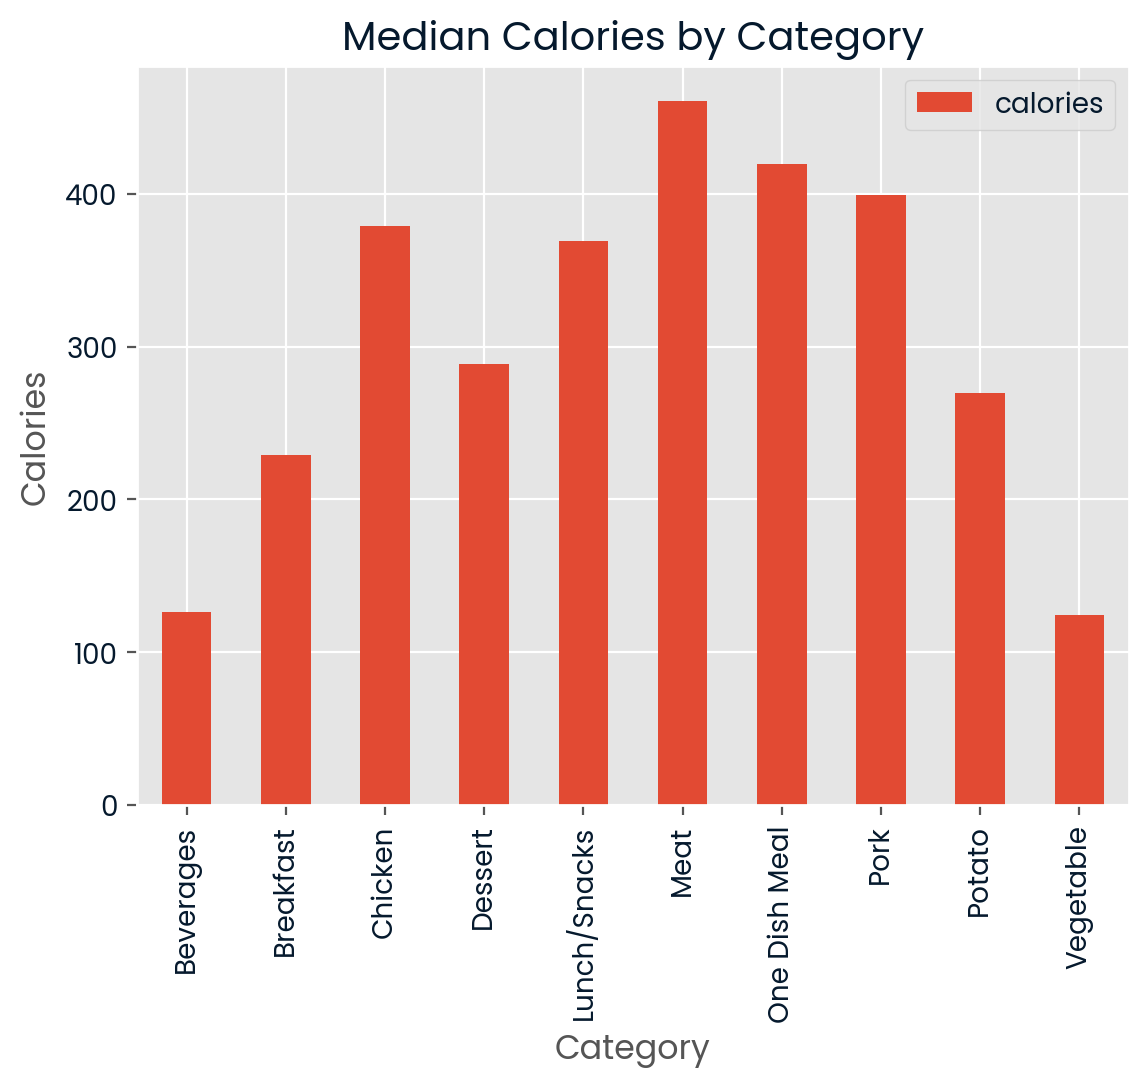

<Figure size 640x480 with 0 Axes>

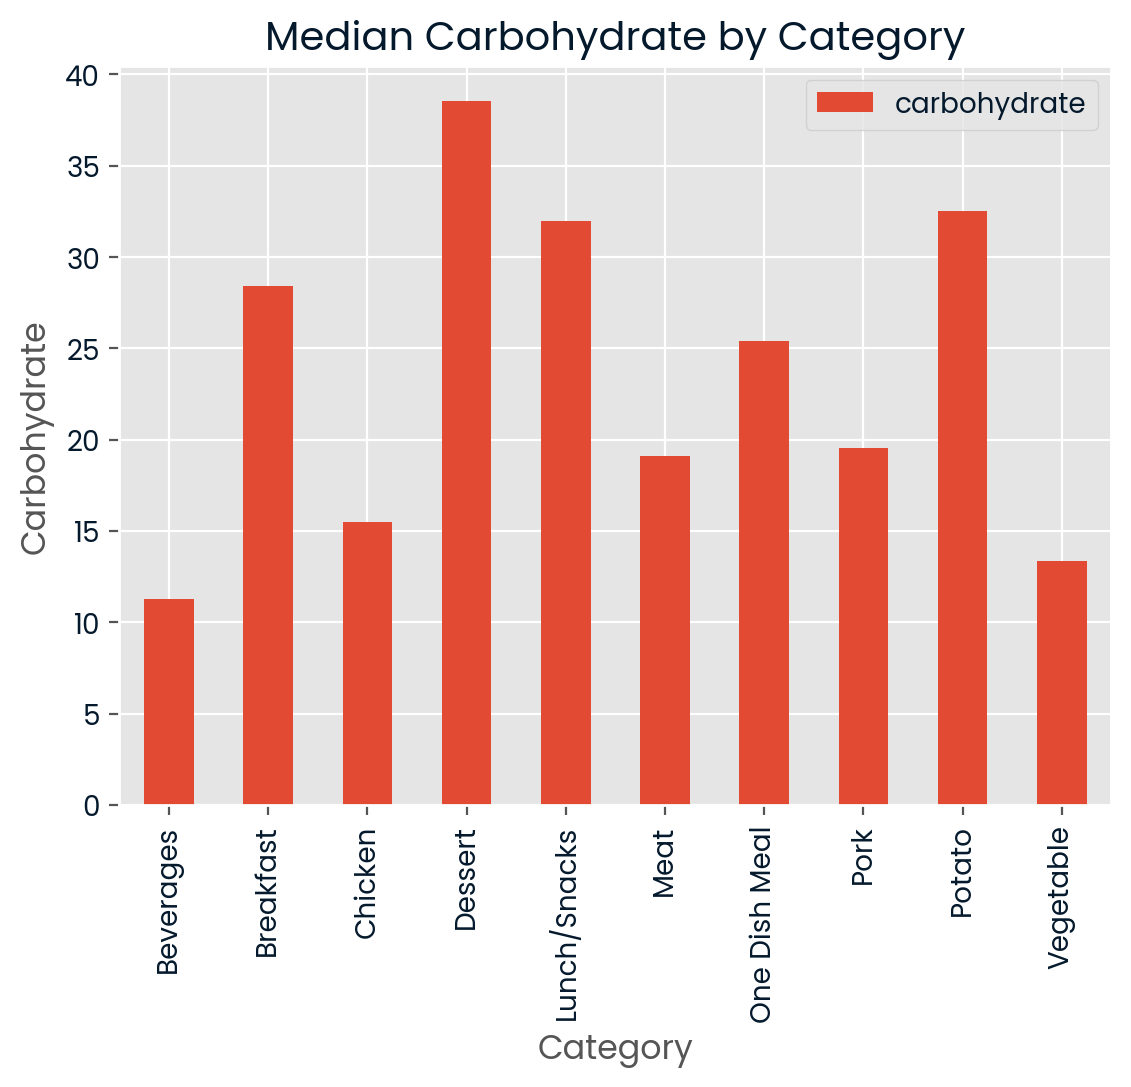

<Figure size 640x480 with 0 Axes>

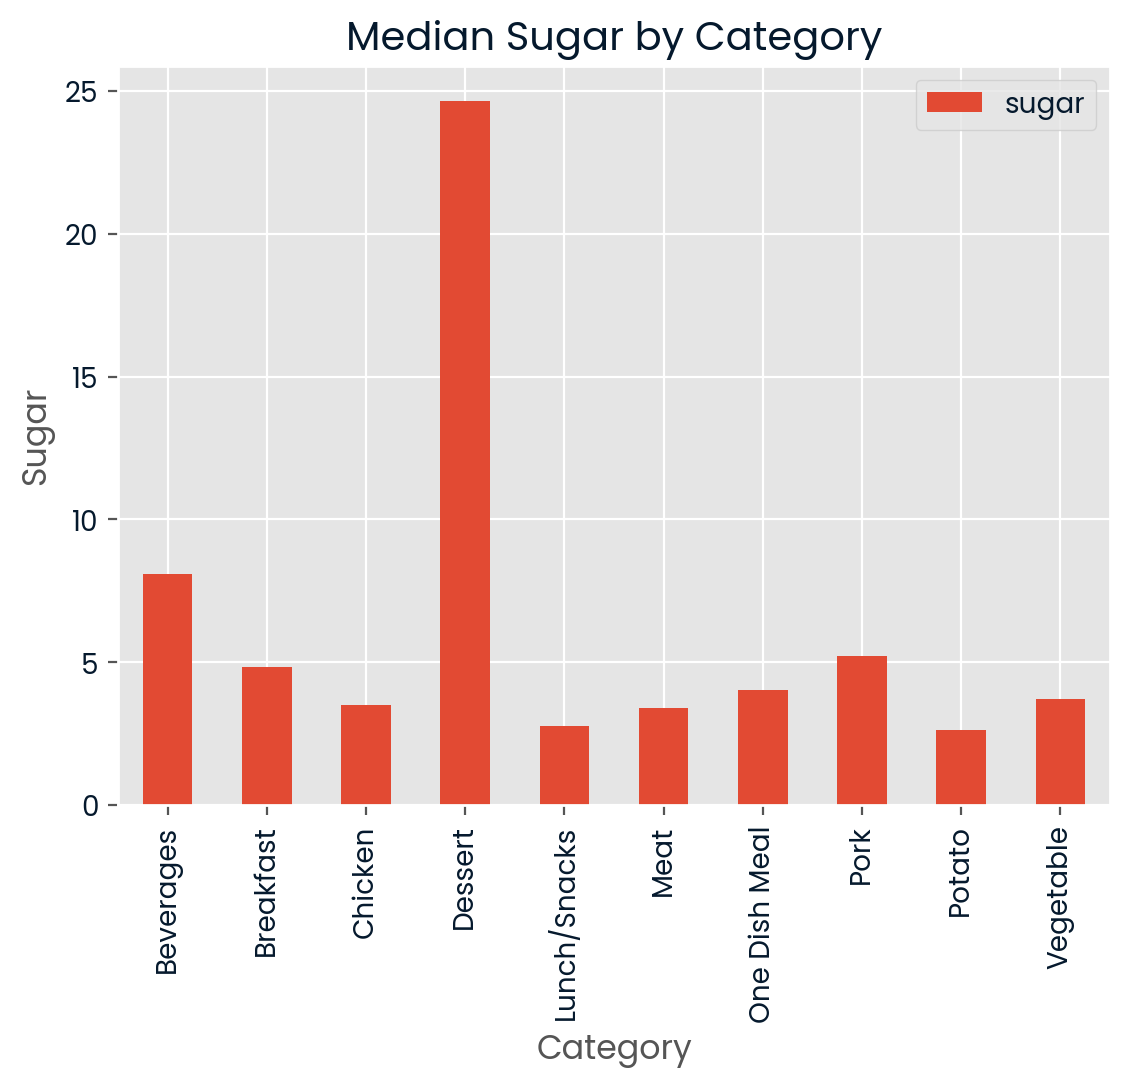

<Figure size 640x480 with 0 Axes>

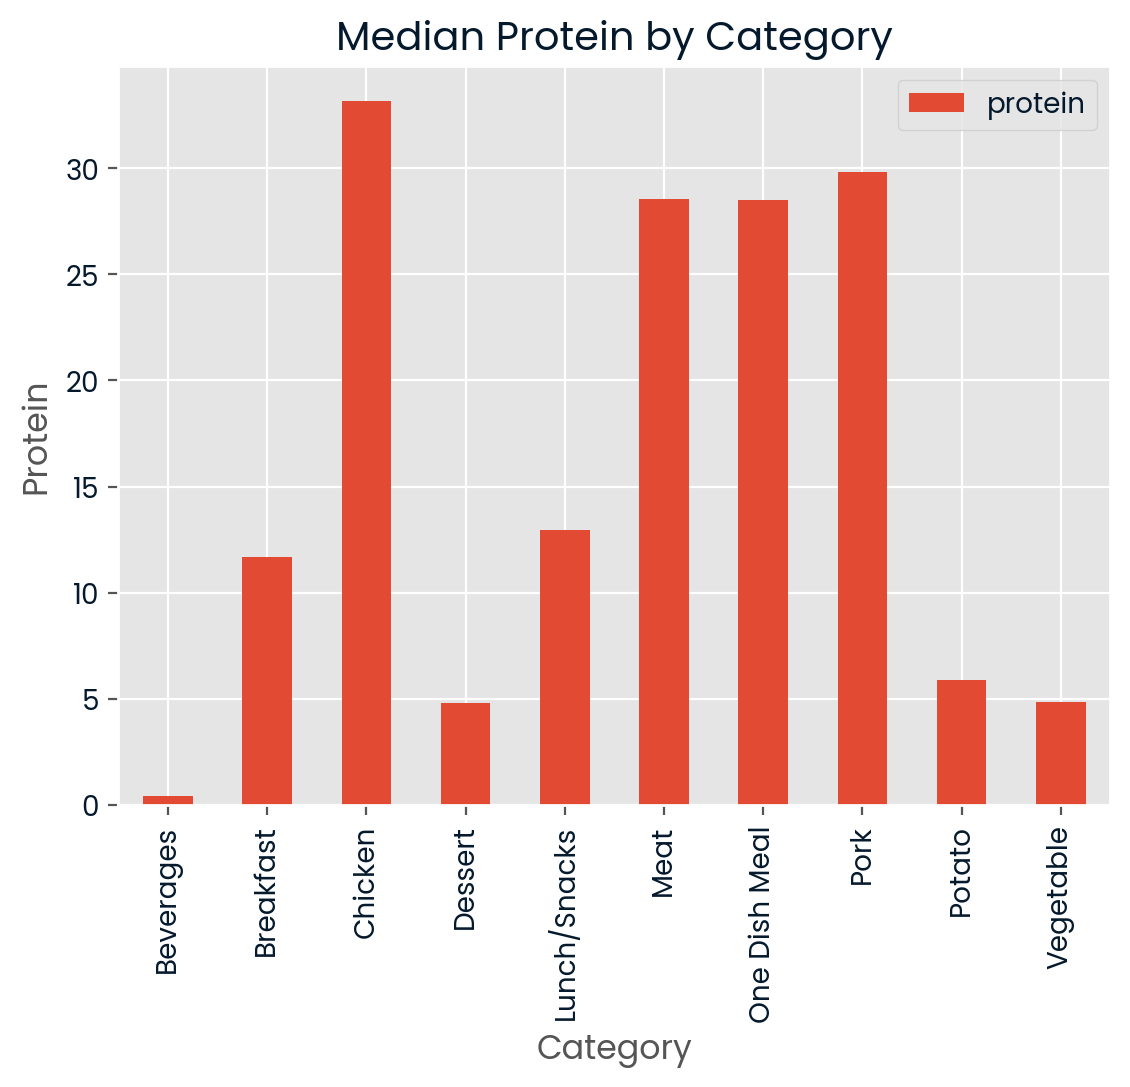

In [87]:
#group by category column and find total number of servings
category_medians = recipe_site_traffic.groupby("category")[numerical_columns].median().reset_index()
print(category_medians)

for column in numerical_columns:
    #create a bar plot
    plt.figure()
    category_medians.plot(x="category", y=column, kind="bar")
    
    #set x and y axis labels
    plt.xlabel("Category")
    plt.ylabel(f"{column.capitalize()}")
    plt.title(f"Median {column.capitalize()} by Category")

#rotate x axis ticks
plt.xticks(rotation=90)
plt.show()

**We observe that the medians for calories and nutritional components aren't symmetrical as anticipated, varying depending on the type of food and beverages.**

**Moving forward, let's begin by examining the relationship between servings and high traffic status**

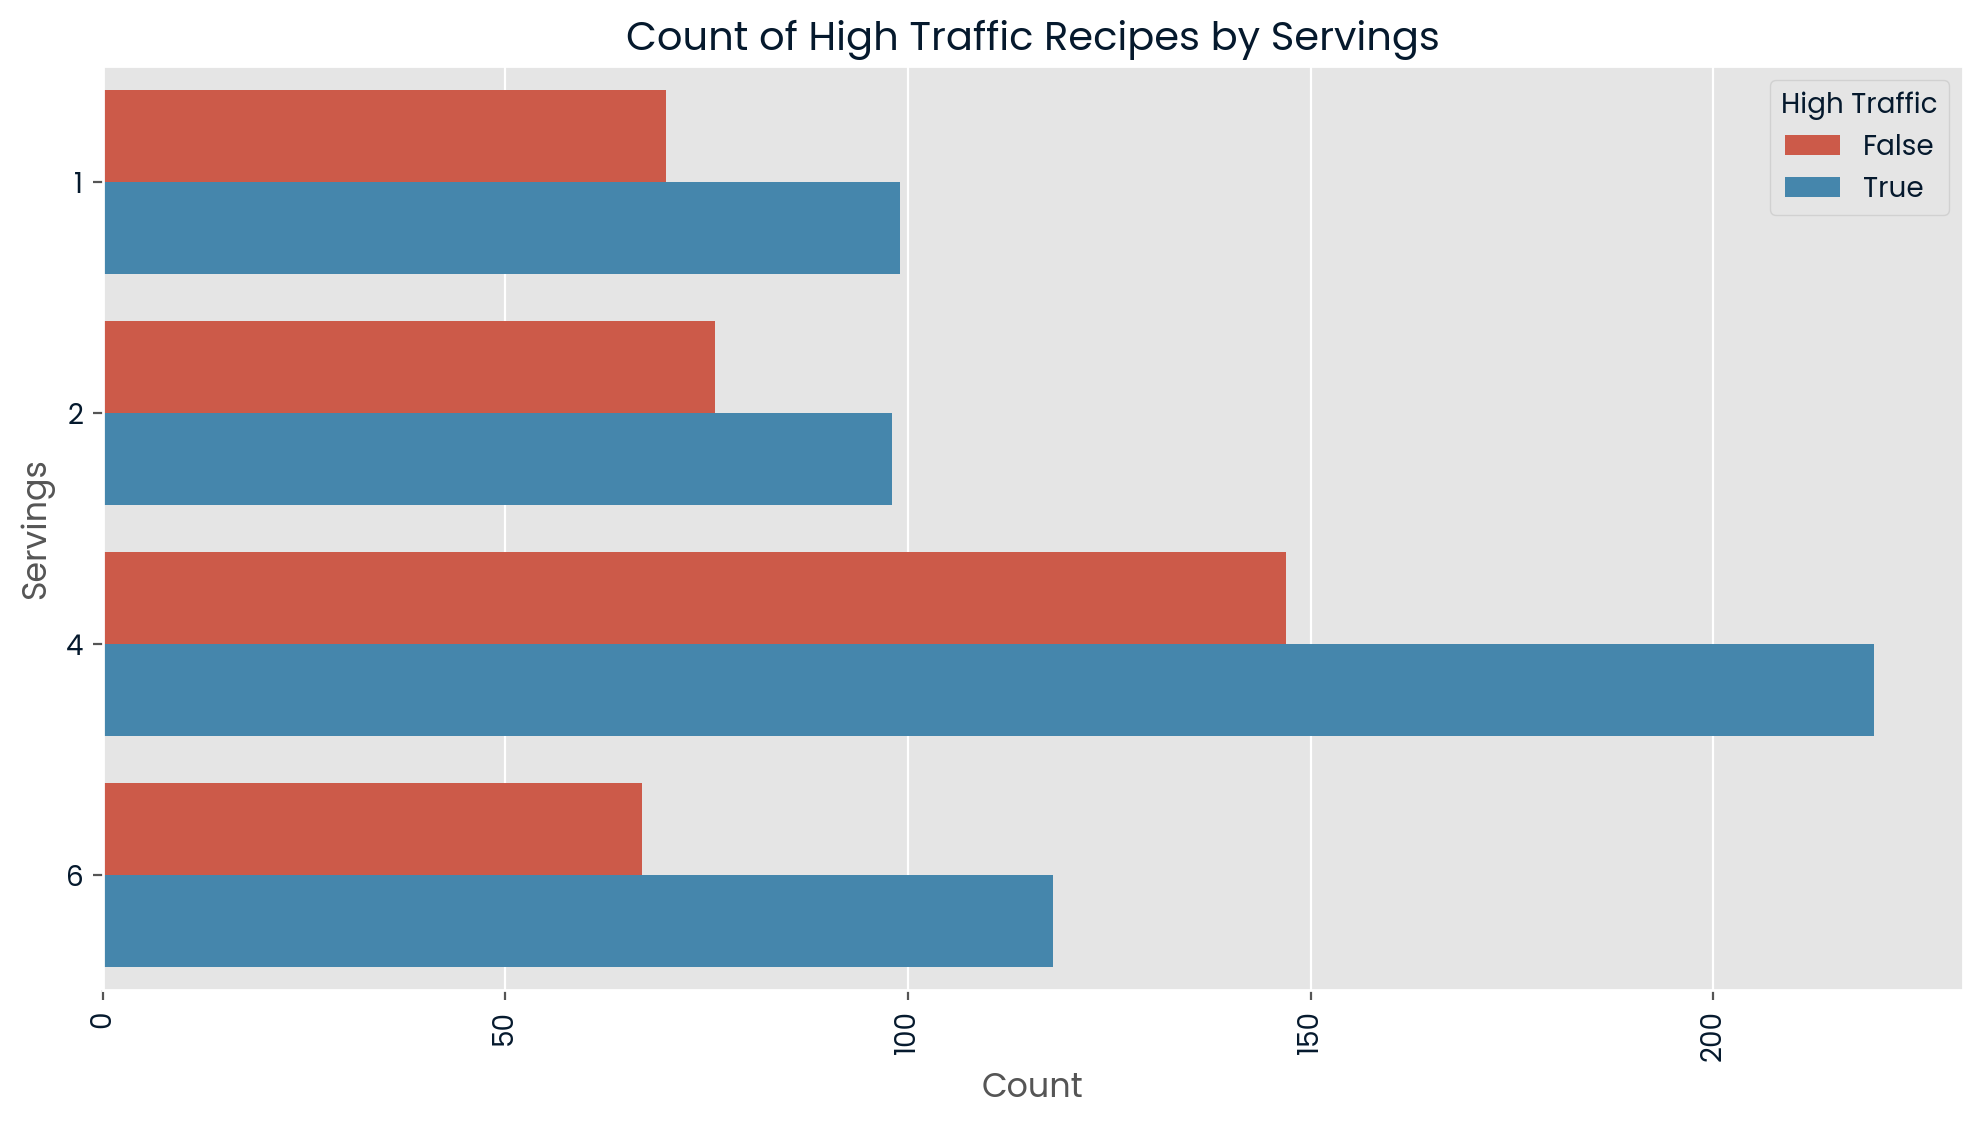

In [88]:
#create a count plot
plt.figure(figsize=(12, 6))
sns.countplot(y="servings", hue="high_traffic", data=recipe_site_traffic)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Servings")

#set title
plt.title("Count of High Traffic Recipes by Servings")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [89]:
#group by high_trafic to show how total number of survings is distributed
high_traffic_servings = pd.pivot_table(recipe_site_traffic, index=["servings"], columns=["high_traffic"], values="recipe", aggfunc='count')
high_traffic_servings_normalized = high_traffic_servings.div(high_traffic_servings.sum(axis=1), axis=0)

print(high_traffic_servings_normalized)

high_traffic     False     True 
servings                        
1             0.414201  0.585799
2             0.436782  0.563218
4             0.400545  0.599455
6             0.362162  0.637838


**Both the plot and the normalized values illustrate that recipes with 6 servings exhibit a higher rate of high traffic.**

**Next, we'll proceed to examine the relationship between categories and high traffic status.**

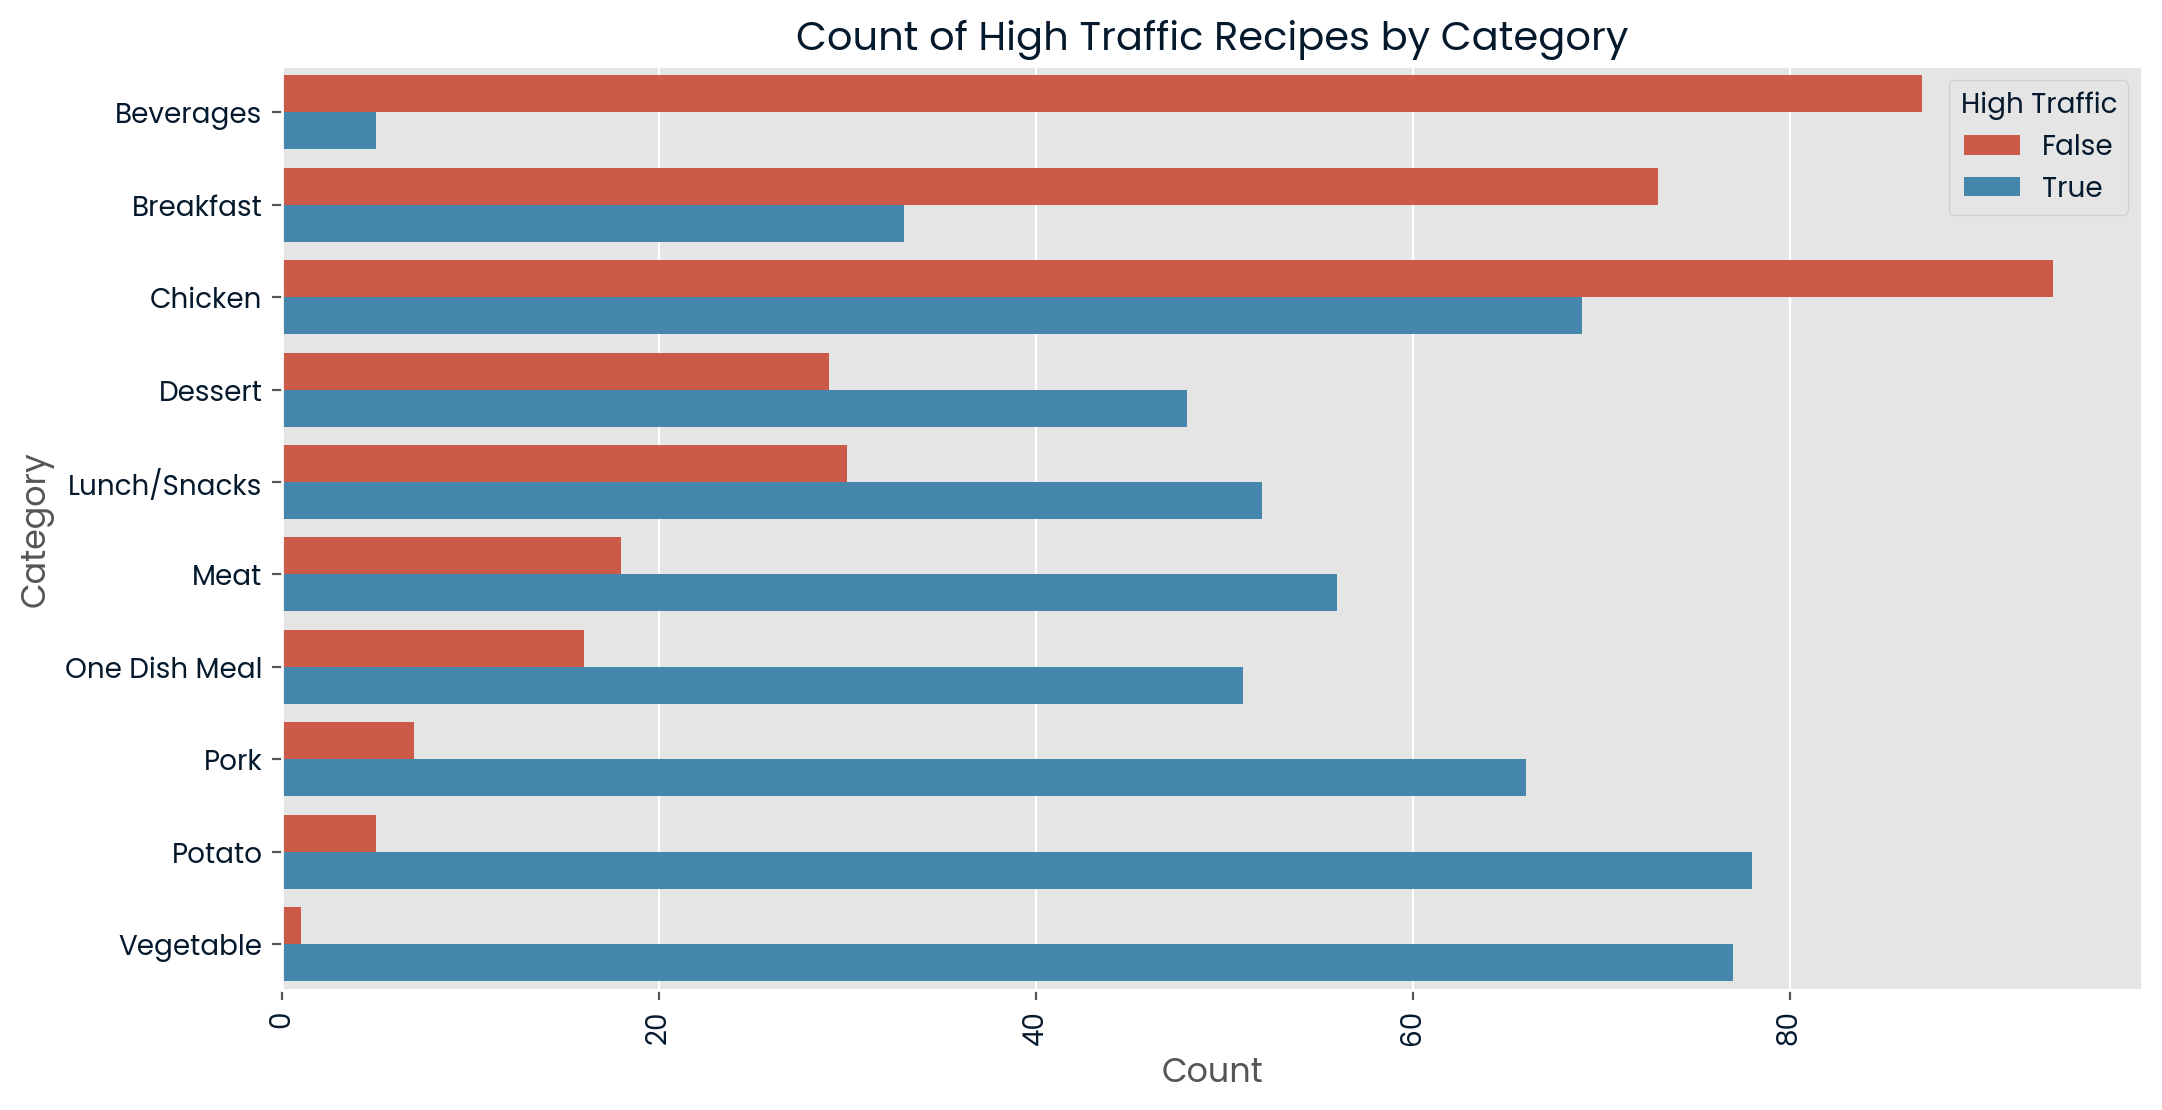

In [90]:
# corr b/w category and high traffic status
plt.figure(figsize=(12, 6))
sns.countplot(y="category", hue="high_traffic", data=recipe_site_traffic)

#set x and y axis labels
plt.xlabel("Count")
plt.ylabel("Category")

#set title
plt.title("Count of High Traffic Recipes by Category")

#set x axis ticks
plt.xticks(rotation=90)

#set legend title
plt.legend(title="High Traffic")
plt.show()

In [91]:
#create pivot table for aggregation
high_traffic_category = recipe_site_traffic.pivot_table(index="category", columns="high_traffic", values="servings", aggfunc="sum")
normalized_table = high_traffic_category.div(high_traffic_category.sum(axis=1), axis=0)

#show the result
print(normalized_table)

high_traffic      False     True 
category                         
Beverages      0.939873  0.060127
Breakfast      0.685294  0.314706
Chicken        0.581056  0.418944
Dessert        0.372263  0.627737
Lunch/Snacks   0.385965  0.614035
Meat           0.270270  0.729730
One Dish Meal  0.198068  0.801932
Pork           0.087452  0.912548
Potato         0.041139  0.958861
Vegetable      0.013986  0.986014


**Consequently, we can deduce that showcasing recipes in certain categories leads to increased traffic.
The top three categories in terms of high traffic are "Vegetable," "Potato," and "Pork." On the other hand, the "Beverages" category appears to have the lowest traffic impact.**

# 3. Model Development

## Target Variable: "high_traffic"

Addressing this problem involves leveraging **binary classification algorithms** from the realm of **supervised machine learning.**
We have the option to select an appropriate **classification model to predict the high traffic status**. 
Viable choices include **Logistic Regression, Decision Tree, Random Forest, or Support Vector Machines.** 
For our baseline model, we'll **opt for Logistic Regression**, and the **others will be considered for comparison**.

**Before proceeding with Logistic Regression, let's tackle the issue of outliers within our dataset. 
To achieve this, we'll compute the Interquartile Range (IQR) for each column and subsequently determine the upper and lower boundaries to manage the outliers more effectively.**

In [92]:
#function to calculate upper and lower boundaries of columns
def calculate_outlier_limits(data, factor=1.5):
    # Find 25% and 75% percentiles
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    #calculate IQR
    iqr = q3 - q1
    
    #calculate lower and upper boundaries
    lower_limit = q1 - (factor * iqr)
    upper_limit = q3 + (factor * iqr)
    return lower_limit, upper_limit


#select numerical columns
numerical_columns = ['calories', 'carbohydrate', 'sugar', 'protein']

#calculate outlier limits for each numerical column
outlier_limits = {}
for column in numerical_columns:
    lower_limit, upper_limit = calculate_outlier_limits(recipe_site_traffic[column])
    outlier_limits[column] = (lower_limit, upper_limit)

#check the calculated outlier limits for each column
for column, limits in outlier_limits.items():
    print(f"Column: {column}")
    print(f"Lower Limit: {limits[0]}")
    print(f"Upper Limit: {limits[1]}")
    print("--------------------------------")

Column: calories
Lower Limit: -620.3999999999999
Upper Limit: 1328.48
--------------------------------
Column: carbohydrate
Lower Limit: -46.510000000000005
Upper Limit: 99.85000000000001
--------------------------------
Column: sugar
Lower Limit: -10.475000000000003
Upper Limit: 21.965000000000003
--------------------------------
Column: protein
Lower Limit: -37.31250000000001
Upper Limit: 70.70750000000001
--------------------------------


**As anticipated, there are no concerns with respect to low values; however, certain high values require attention.
Various techniques are available to address this issue. Upon evaluation, it's apparent that outright removal of outliers leads to significant data loss, making this approach less favorable.
Similarly, capping outliers or using winsorization doesn't yield the desired distribution.**

**Through experimentation with diverse transformation methods including Logarithmic Transformation, Square Root Transformation, Yeo-Johnson Transformation, and Box-Cox Transformation, it has been determined that the Yeo-Johnson Transformation is the most effective approach.**

**Note that a few columns contain 0 values. While the Box-Cox Transformation could be used after replacing these 0 values with a very small value (e.g., 0.00001), such a replacement might introduce bias. Therefore, the Yeo-Johnson method has been preferred in this case.**

In [93]:
#specifying the numerical columns to plot
numerical_columns =  recipe_site_traffic.select_dtypes(include='float').columns

#filter the dataset based on the outlier limits
transformed_data = recipe_site_traffic.copy()
for column, limits in outlier_limits.items():
    lower_limit, upper_limit = limits
    transformed_data[column] = yeojohnson(transformed_data[column])[0]     # Yeo-Johnson Transformation

# Check the filtered dataset
transformed_data.round(3).head()

,recipe,calories,carbohydrate,sugar,protein,category,servings,high_traffic
0,2,5.743,4.409,0.481,0.653,Potato,4,True
1,3,17.438,4.551,1.224,1.361,Breakfast,1,False
2,4,8.416,4.091,2.587,0.020,Beverages,4,True
3,5,5.133,1.102,0.554,0.426,Beverages,4,False
4,6,16.024,1.608,0.884,4.049,One Dish Meal,2,True


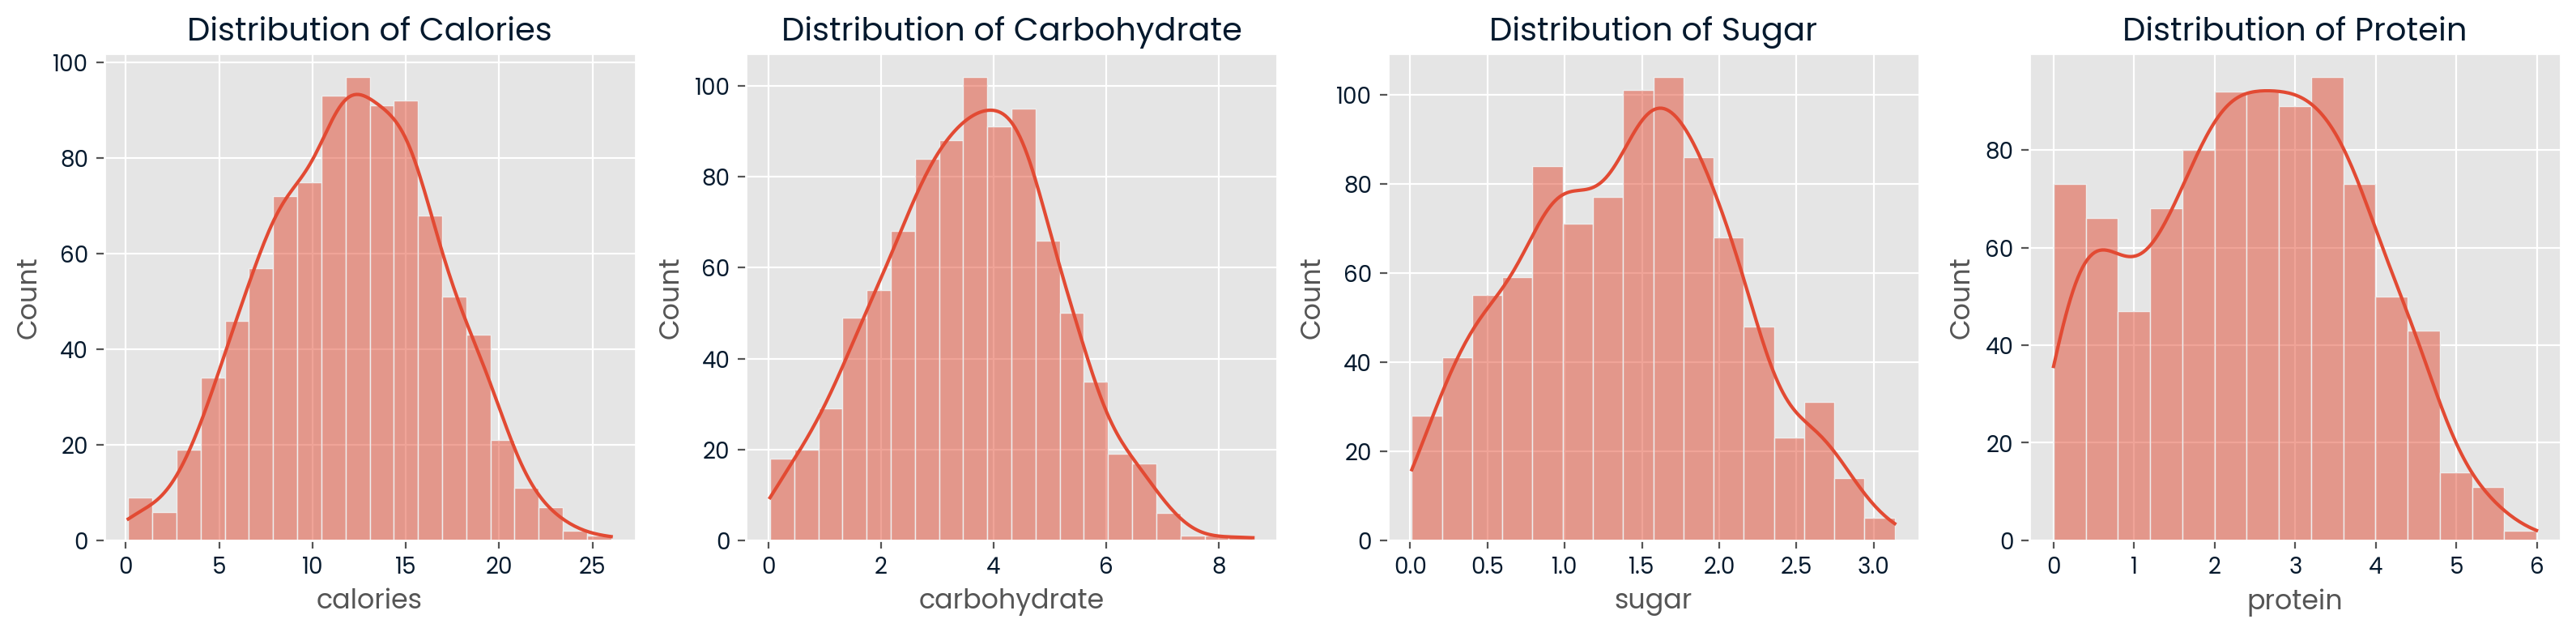

In [94]:
plt.figure(figsize=(16, 4))

#iterating over each column and create a bar plot
for i, column in enumerate(numerical_columns):
    plt.subplot(1, len(numerical_columns), i+1)
    sns.histplot(data=transformed_data, x=column, kde=True)
    plt.title(f"Distribution of {column.capitalize()}")

#adjust the spacing between subplots if needed
plt.tight_layout()
plt.show()

In [95]:
#performing one-hot encoding on the category column
encoded_categories = pd.get_dummies(recipe_site_traffic["category"])

#concatenate the encoded categories with the original dataframe
recipe_site_traffic_encoded = pd.concat([transformed_data, encoded_categories], axis=1)

#drop the original category column
recipe_site_traffic_encoded = recipe_site_traffic_encoded.drop("category", axis=1)
recipe_site_traffic_encoded.head()

,recipe,calories,carbohydrate,sugar,protein,servings,high_traffic,Beverages,Breakfast,Chicken,Dessert,Lunch/Snacks,Meat,One Dish Meal,Pork,Potato,Vegetable
0,2,5.742713,4.409023,0.481476,0.653469,4,True,0,0,0,0,0,0,0,0,1,0
1,3,17.437755,4.550612,1.224094,1.360783,1,False,0,1,0,0,0,0,0,0,0,0
2,4,8.416476,4.091120,2.587147,0.019804,4,True,1,0,0,0,0,0,0,0,0,0
3,5,5.133412,1.101661,0.553884,0.425754,4,False,1,0,0,0,0,0,0,0,0,0
4,6,16.024490,1.607528,0.883720,4.049462,2,True,0,0,0,0,0,0,1,0,0,0


**Certainly, we'll proceed as follows:**
**Split the data into features (X) and the target variable (y), where the target variable is the "high_traffic" column.**
**Further divide the data into training and testing sets using the train_test_split function from the scikit-learn library.**
**Develop both the baseline model and comparison models.**
**Fit the chosen model on the training data and employ it to predict the outcomes on the testing data.** **Additionally, we can utilize the predict method on the trained model to assess the potential of overfitting.
With this in mind, let's proceed to create the baseline and comparison machine learning models.**

In [96]:
#split the data into features (X) and target variable (y)
X = recipe_site_traffic_encoded.drop("high_traffic", axis=1)
y = recipe_site_traffic_encoded["high_traffic"]

#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

#create function to fit the model, make prediction, and return evaluation metrics
def develop_model(model, X_train, y_train, X_test, y_test):
    evaulation_metrics = {}

    #fit the model
    model.fit(X_train, y_train)

    #predict for train and test data
    model_pred_train = model.predict(X_train)
    model_pred_test = model.predict(X_test)

    #find evaluation parameters for train data
    model_accuracy_train = accuracy_score(y_train, model_pred_train)
    model_precision_train = precision_score(y_train, model_pred_train)
    model_recall_train = recall_score(y_train, model_pred_train)
    model_f1_train = f1_score(y_train, model_pred_train)
    model_cm_train = confusion_matrix(y_train, model_pred_train)
    
    evaulation_metrics['train'] = [model_accuracy_train, model_precision_train, model_recall_train, model_f1_train, model_cm_train]

    #find evaluation parameters for test data
    model_accuracy_test = accuracy_score(y_test, model_pred_test)
    model_precision_test = precision_score(y_test, model_pred_test)
    model_recall_test = recall_score(y_test, model_pred_test)
    model_f1_test = f1_score(y_test, model_pred_test)
    model_cm_test = confusion_matrix(y_test, model_pred_test)
    
    evaulation_metrics['test'] = [model_accuracy_test, model_precision_test, model_recall_test, model_f1_test, model_cm_test]

    return evaulation_metrics

In [97]:
#logistic regression
logreg = LogisticRegression()
logreg_evaluation_metrics = develop_model(logreg, X_train, y_train, X_test, y_test)

#decision tree
dtree = DecisionTreeClassifier()
dtree_evaluation_metrics = develop_model(dtree, X_train, y_train, X_test, y_test)

#random forest
rf = RandomForestClassifier()
rf_evaluation_metrics = develop_model(rf, X_train, y_train, X_test, y_test)

#support vector machines
svm = SVC()
svm_evaluation_metrics = develop_model(svm, X_train, y_train, X_test, y_test)

In [98]:
def print_metrics(evaluation_metrics):
    print("  Accuracy:", evaluation_metrics[0])
    print("  Precision:", evaluation_metrics[1])
    print("  Recall:", evaluation_metrics[2])
    print("  F1-Score:", evaluation_metrics[3])
    print("  Confusion Matrix:")
    print(evaluation_metrics[4])

# 4. Model evaluation

## Logistic Regression

In [99]:
#print the evaluation metrics and confusion matrices for Logistic Regression
print("Logistic Regression Train:")
print_metrics(logreg_evaluation_metrics['train'])

print("Logistic Regression Test:")
print_metrics(logreg_evaluation_metrics['test'])

Logistic Regression Train:
  Accuracy: 0.7653631284916201
  Precision: 0.8009478672985783
  Recall: 0.8009478672985783
  F1-Score: 0.8009478672985783
  Confusion Matrix:
[[210  84]
 [ 84 338]]
Logistic Regression Test:
  Accuracy: 0.7653631284916201
  Precision: 0.808695652173913
  Recall: 0.8230088495575221
  F1-Score: 0.8157894736842104
  Confusion Matrix:
[[44 22]
 [20 93]]


**The evaluation of the Logistic Regression model reveals a marginal difference between test and train results. The slight elevation of test results in comparison to train results implies the presence of limited data for model development. Moreover, there is no indication of overfitting.**


**Given that the objective is to achieve an 80% accuracy in predicting high traffic recipes, it's essential to examine the precision metrics, which stands at 80.34%. This precision score aligns with the goal of correctly predicting high traffic recipes 80% of the time.**

## Decision Tree

In [100]:
#print the evaluation metrics and confusion matrices for Decision Tree
print("Decision Tree Train:")
print_metrics(dtree_evaluation_metrics['train'])

print("Decision Tree Test:")
print_metrics(dtree_evaluation_metrics['test'])

Decision Tree Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Decision Tree Test:
  Accuracy: 0.6759776536312849
  Precision: 0.7570093457943925
  Recall: 0.7168141592920354
  F1-Score: 0.7363636363636364
  Confusion Matrix:
[[40 26]
 [32 81]]


**The Decision Tree model, being robust in nature, has demonstrated an instance of overfitting due to the low number of observations within the dataset. This overfitting indicates that the model has essentially memorized the training data, rendering it unsuitable for our specific dataset.**


**It's important to note that various techniques, including strategies like Increasing Training Data, Regularization, and Cross-Validation, can be employed to address overfitting. However, considering the limited data available, these techniques may not yield the desired outcome.**


**In light of these considerations, the Decision Tree model may not be the best fit for our dataset due to its overfitting tendencies.**

## Rondom Forest

In [101]:
#print the evaluation metrics and confusion matrices for Random Fores
print("Random Forest Train:")
print_metrics(rf_evaluation_metrics['train'])

print("Random Forest Test:")
print_metrics(rf_evaluation_metrics['test'])

Random Forest Train:
  Accuracy: 1.0
  Precision: 1.0
  Recall: 1.0
  F1-Score: 1.0
  Confusion Matrix:
[[294   0]
 [  0 422]]
Random Forest Test:
  Accuracy: 0.770949720670391
  Precision: 0.8103448275862069
  Recall: 0.831858407079646
  F1-Score: 0.8209606986899564
  Confusion Matrix:
[[44 22]
 [19 94]]


**Similar to the Decision Tree model, the Random Forest model, being a robust algorithm, also exhibits characteristics of overfitting. This is consistent with the explanation provided earlier for the Decision Tree model. While the precision score surpasses the desired 80%, meeting our objective, the presence of overfitting makes the Random Forest model unsuitable for use.**


**In this case, even though the precision score aligns with our goal, the overfitting issue precludes us from utilizing the Random Forest model effectively.**

## Support VectorMahine

In [102]:
# Print the evaluation metrics and confusion matrices for Support Vector Machines
print("Support Vector Machines Train:")
print_metrics(svm_evaluation_metrics['train'])

print("Support Vector Machines Test:")
print_metrics(svm_evaluation_metrics['test'])

Support Vector Machines Train:
  Accuracy: 0.5893854748603352
  Precision: 0.5893854748603352
  Recall: 1.0
  F1-Score: 0.741652021089631
  Confusion Matrix:
[[  0 294]
 [  0 422]]
Support Vector Machines Test:
  Accuracy: 0.6312849162011173
  Precision: 0.6312849162011173
  Recall: 1.0
  F1-Score: 0.773972602739726
  Confusion Matrix:
[[  0  66]
 [  0 113]]


**Within the Support Vector Machines (SVM) model, we encounter underfitting. This arises due to the model's inability to effectively learn from the limited training data available. The recall value being equal to 1 is indicative of the model consistently predicting 0 for all cases.**


**We can establish a Key Performance Indicator (KPI) by dividing True Positives (high recipes correctly classified as high) by False Positives (low recipes mistakenly classified as high) within the confusion matrix. This KPI, which we can refer to as the "High Traffic Conversion Rate," needs to be maintained at a level equal to or greater than 4.0, relying on the train and test results of our baseline model. This KPI can serve as a valuable metric for our business model, providing insights into the accuracy of high traffic predictions.**

In [103]:
# KPI calculation
def calculate_kpi(model_metrics, model_name):
    kpi_train = model_metrics['train'][4]
    kpi_test = model_metrics['test'][4]
    print(f"High Traffic Conversion Rate for {model_name} train: ", kpi_train[1][1]/(kpi_train[0][1]))
    print(f"High Traffic Conversion Rate for {model_name} test: ", kpi_test[1][1]/(kpi_test[0][1]))

In [104]:
#KPI calculation for Logistic Regression
calculate_kpi(logreg_evaluation_metrics, "Logistic Regresssion")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Decision Tree
calculate_kpi(dtree_evaluation_metrics, "Decision Tree")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Random Forest
calculate_kpi(rf_evaluation_metrics, "Random Forest")
print("-----------------------------------------------------------------------------------")

#KPI calculation for Support Vector Machines
calculate_kpi(svm_evaluation_metrics, "Support Vector Machines")
print("-----------------------------------------------------------------------------------")

High Traffic Conversion Rate for Logistic Regresssion train:  4.023809523809524
High Traffic Conversion Rate for Logistic Regresssion test:  4.2272727272727275
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Decision Tree train:  inf
High Traffic Conversion Rate for Decision Tree test:  3.1153846153846154
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Random Forest train:  inf
High Traffic Conversion Rate for Random Forest test:  4.2727272727272725
-----------------------------------------------------------------------------------
High Traffic Conversion Rate for Support Vector Machines train:  1.435374149659864
High Traffic Conversion Rate for Support Vector Machines test:  1.7121212121212122
-----------------------------------------------------------------------------------



**In the training results of the Decision Tree and Random Forest models, the "KPI = inf" occurs due to overfitting. Furthermore, the test results for these models fall short of meeting our predetermined KPI requirement.**


**In both the training and testing results of the SVM model, underfitting contributes to the non-fulfillment of our KPI requirement.**


**Ultimately, in our baseline Logistic Regression model, both the training and testing results successfully adhere to our KPI requirement.**

# 5. Metric for the business to monitor

## SUMMARY

**In summary, our endeavors encompassed the development and evaluation of multiple models to attain our objective. Among the array of models created, the logistic regression model emerged as the most effective performer. This underscores that the logistic regression model is the optimal choice for predicting high traffic recipes and achieving an 80% accuracy in this prediction.**


**Taking a business perspective into account, predicting a high-traffic recipe as low traffic is a more significant error than the opposite scenario. Hence, our primary focus is on model precision, as an erroneous prediction of low traffic for a potentially high-traffic recipe can lead to substantial losses for the business.**


**Furthermore, we introduced a bespoke Key Performance Indicator (KPI) named "High Traffic Conversion Rate." Its value was derived from our baseline model outcomes. We then employed this KPI to facilitate comparisons among the developed models.**


**Through exploratory analysis, we unearthed specific recipe categories that consistently yield high or low traffic. Specifically, recipes categorized as "Vegetable," "Potato," or "Pork" tend to generate high traffic, making them recommended candidates for inclusion on the website. Conversely, recipes categorized as "Beverages" typically result in low traffic, suggesting they should not be featured on the platform.**